## PIL 모듈을 이용한 이미지 열기 및 array화

In [ ]:
from PIL import Image

img = Image.open('2Day자료//img//sample.jpg')
img

In [ ]:
import numpy as np

type(img), np.shape(img)

In [ ]:
imgArr = np.array(img)
imgArr

In [ ]:
imgArr[:100,:,:] = 0

import matplotlib.pyplot as plt
plt.imshow(imgArr)
plt.show()

## 파일 헤더, 파일 시그니처 확인

In [ ]:
import imghdr

imghdr.what('2Day자료//img//sample.jpg')

In [ ]:
with open('2Day자료//img//sample.jpg','rb') as f:
    data = f.read(20)
data.hex()

## 여러개의 이미지 확인

In [ ]:
from glob import glob

fileList = glob('2Day자료//img//*')
fileList

In [ ]:
for x in fileList:
    img = Image.open(x)
    print("파일명 : ", x, ", 파일 헤더 : ",imghdr.what(x))
    with open(x,'rb') as f:
        data = f.read(20)
    print(data.hex())

## 채널수가 다를때 에러 확인

In [ ]:
fileList = glob('2Day자료//img//*')
fileList

In [ ]:
result = []

for x in fileList:
    img = Image.open(x)

    imgArr = np.array(img)

    print(x,imgArr.shape)
    result.append(imgArr)   

In [ ]:
# shape이 다르기 때문에 np 안됌
np.shape(result)

## 실습 : r 값이 200이상, g값이 100이상, b값이 50이상이면 [0,0,0] 으로 변경

In [ ]:
img = Image.open('2Day자료//img//sample.jpg')
img

In [ ]:
imgArr = np.array(img)
imgArr

In [ ]:
imgArr.shape

In [ ]:
img

In [ ]:
imgArr[imgArr[:,:,0]>=200] = 0
imgArr[imgArr[:,:,1]>=100] = 0
imgArr[imgArr[:,:,2]>=50] = 0

plt.imshow(imgArr)
plt.show()

## 실습2 : 이미지자료의 numpy화.html의 1~5번까지 작업

## 3채널 이미지 데이터만 모아보기

In [ ]:
fileList = glob('2Day자료//img//*')
fileList

In [ ]:
sh3 = []
for x in fileList:
    img = Image.open(x).resize((100,100))
    imgArr = np.array(img)

    if imgArr.shape[2] == 3:
        print("경로 : ",x," , shape : ", imgArr.shape)
        sh3.append(imgArr)
sh3

In [ ]:
plt.figure(figsize=(20,5))
cnt = len(sh3)
for count,x in enumerate(sh3):
    plt.subplot(1,cnt,count+1)
    plt.imshow(x)
    plt.title(str(count+1)+" image")

In [ ]:
plt.imshow(np.hstack(sh3[:]))

## 이미지 자료 스케일링

In [73]:
fileList = glob('2Day자료//img//*')
fileList

['2Day자료//img\\cells.png',
 '2Day자료//img\\lena_color.bmp',
 '2Day자료//img\\pen.png',
 '2Day자료//img\\rice.png',
 '2Day자료//img\\sample.jpg',
 '2Day자료//img\\Taegeuk.bmp',
 '2Day자료//img\\Taegeuk_result.png',
 '2Day자료//img\\고등어.png',
 '2Day자료//img\\나비.png']

In [74]:
result = []
for x in fileList:
    img = Image.open(x).resize((100,100))
    
    imgArr = np.array(img)

    if imgArr.shape[2] == 3:
        result.append(imgArr/255)
print(np.shape(result))
print(result[0][0][0])

(5, 100, 100, 3)
[0.91764706 0.89019608 0.90980392]


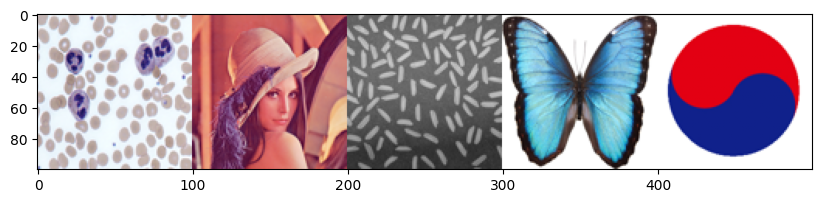

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(result[:]))

In [ ]:
result = []
for x in fileList:
    img = Image.open(x).resize((100,100))
    
    imgArr = np.array(img)

    if imgArr.shape[2] == 3:
        result.append(imgArr/127)
print(np.shape(result))
print(result[0][0][0])
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(result[:]))

In [82]:
data = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
data = data + 100
data , data.shape

(array([[[101, 102, 103],
         [104, 105, 106]],
 
        [[107, 108, 109],
         [110, 111, 112]]]),
 (2, 2, 3))

In [83]:
data = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
data = data + [100,100,100]
data , data.shape

(array([[[101, 102, 103],
         [104, 105, 106]],
 
        [[107, 108, 109],
         [110, 111, 112]]]),
 (2, 2, 3))

## 이미지 numpy 변환하여 저장

# jpg를 array 변환하여 npz, npy로 변환하여 전달할 수 있음
# npz, npy를 바로 볼 수 있음

In [79]:
np.save('2Day자료//imgs.npy',result)

In [84]:
# 최솟값, 최댓값이 0,1 이면 스케일링된 이미지 데이터임
# 하지만 어떠한 값을 스케일링된지 모름 255, 127...

file = np.load('2Day자료//imgs.npy')
np.min(file), np.max(file)

(0.0, 1.0)

In [106]:
# npz는 폴더명으로 만듬

fileList = glob('2Day자료//img//*')
fileList

['2Day자료//img\\cells.png',
 '2Day자료//img\\lena_color.bmp',
 '2Day자료//img\\pen.png',
 '2Day자료//img\\rice.png',
 '2Day자료//img\\sample.jpg',
 '2Day자료//img\\Taegeuk.bmp',
 '2Day자료//img\\Taegeuk_result.png',
 '2Day자료//img\\고등어.png',
 '2Day자료//img\\나비.png']

In [130]:
x , y = [] , []

for file in fileList:
    img = Image.open(file).resize((20,30))
    imgArr = np.array(img)/256

    # 채널 수 확인하는 방법
    # 1) 헤더 파일
    # 2) 행,열,채널 수

    # 차원이 다르면 npz로 묶을 수 없음
    if imgArr.shape[2] == 3:

        name = file.split('\\')[1].split('.')[0]

        x.append(imgArr)
        y.append(name)



In [131]:
len(x) , len(y)

(5, 5)

In [132]:
x , y 

([array([[[0.765625  , 0.7109375 , 0.7109375 ],
          [0.828125  , 0.8125    , 0.8203125 ],
          [0.8671875 , 0.86328125, 0.87109375],
          ...,
          [0.90234375, 0.91015625, 0.91796875],
          [0.83203125, 0.81640625, 0.82421875],
          [0.88671875, 0.90234375, 0.921875  ]],
  
         [[0.765625  , 0.73046875, 0.73828125],
          [0.80859375, 0.77734375, 0.78515625],
          [0.7578125 , 0.6953125 , 0.69140625],
          ...,
          [0.7890625 , 0.73828125, 0.7265625 ],
          [0.85546875, 0.84765625, 0.85546875],
          [0.953125  , 0.9921875 , 0.99609375]],
  
         [[0.87890625, 0.8984375 , 0.921875  ],
          [0.85546875, 0.859375  , 0.875     ],
          [0.76171875, 0.71484375, 0.71875   ],
          ...,
          [0.8046875 , 0.77734375, 0.77734375],
          [0.86328125, 0.8671875 , 0.87890625],
          [0.9609375 , 0.99609375, 0.99609375]],
  
         ...,
  
         [[0.93359375, 0.96875   , 0.98828125],
          [0.9

In [133]:
np.savez('2Day자료//imgsXY.npz',xData=x,yData=y)

In [134]:
data = np.load('2Day자료//imgsXY.npz')
data

In [135]:
list(data)

['xData', 'yData']

In [136]:
xValue = data['xData']
yValue = data['yData']

In [137]:
np.shape(xValue), np.shape(yValue)

((5, 30, 20, 3), (5,))

In [138]:
xValue, yValue

(array([[[[0.765625  , 0.7109375 , 0.7109375 ],
          [0.828125  , 0.8125    , 0.8203125 ],
          [0.8671875 , 0.86328125, 0.87109375],
          ...,
          [0.90234375, 0.91015625, 0.91796875],
          [0.83203125, 0.81640625, 0.82421875],
          [0.88671875, 0.90234375, 0.921875  ]],
 
         [[0.765625  , 0.73046875, 0.73828125],
          [0.80859375, 0.77734375, 0.78515625],
          [0.7578125 , 0.6953125 , 0.69140625],
          ...,
          [0.7890625 , 0.73828125, 0.7265625 ],
          [0.85546875, 0.84765625, 0.85546875],
          [0.953125  , 0.9921875 , 0.99609375]],
 
         [[0.87890625, 0.8984375 , 0.921875  ],
          [0.85546875, 0.859375  , 0.875     ],
          [0.76171875, 0.71484375, 0.71875   ],
          ...,
          [0.8046875 , 0.77734375, 0.77734375],
          [0.86328125, 0.8671875 , 0.87890625],
          [0.9609375 , 0.99609375, 0.99609375]],
 
         ...,
 
         [[0.93359375, 0.96875   , 0.98828125],
          [0.92968

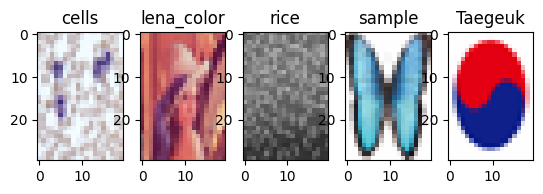

In [139]:
cnt = 0
for x , y in zip(xValue,yValue):
    cnt += 1
    plt.subplot(1,len(xValue),cnt)
    plt.imshow(x)
    plt.title(y)

In [142]:
xValue[0] , xValue[0].shape

(array([[[0.765625  , 0.7109375 , 0.7109375 ],
         [0.828125  , 0.8125    , 0.8203125 ],
         [0.8671875 , 0.86328125, 0.87109375],
         ...,
         [0.90234375, 0.91015625, 0.91796875],
         [0.83203125, 0.81640625, 0.82421875],
         [0.88671875, 0.90234375, 0.921875  ]],
 
        [[0.765625  , 0.73046875, 0.73828125],
         [0.80859375, 0.77734375, 0.78515625],
         [0.7578125 , 0.6953125 , 0.69140625],
         ...,
         [0.7890625 , 0.73828125, 0.7265625 ],
         [0.85546875, 0.84765625, 0.85546875],
         [0.953125  , 0.9921875 , 0.99609375]],
 
        [[0.87890625, 0.8984375 , 0.921875  ],
         [0.85546875, 0.859375  , 0.875     ],
         [0.76171875, 0.71484375, 0.71875   ],
         ...,
         [0.8046875 , 0.77734375, 0.77734375],
         [0.86328125, 0.8671875 , 0.87890625],
         [0.9609375 , 0.99609375, 0.99609375]],
 
        ...,
 
        [[0.93359375, 0.96875   , 0.98828125],
         [0.9296875 , 0.97265625, 0.99609

In [143]:
# 리스트
a = [1,2,3]
print(a[0])
a[0] = 999
a

1


[999, 2, 3]

In [144]:
# 튜플
a = (1,2,3)
print(a[0])
a[0] = 999
a

1


TypeError: 'tuple' object does not support item assignment

In [140]:
!pip install tensorflow-cpu

     ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/272.9 MB 1.7 MB/s eta 0:02:46
     ---------------------------------------- 0.1/272.9 MB 1.4 MB/s eta 0:03:09
     ---------------------------------------- 0.2/272.9 MB 1.5 MB/s eta 0:03:02
     ---------------------------------------- 0.2/272.9 MB 1.4 MB/s eta 0:03:20
     ---------------------------------------- 0.3/272.9 MB 1.4 MB/s eta 0:03:21
     ---------------------------------------- 0.4/272.9 MB 1.3 MB/s eta 0:03:29
     ---------------------------------------- 0.4/272.9 MB 1.3 MB/s eta 0:03:23
     ---------------------------------------- 0.5/272.9 MB 1.2 MB/s eta 0:03:43
     ---------------------------------------- 0.5/272.9 MB 1.3 MB/s eta 0:03:36
     ---------------------------------------- 0.6/272.9 MB 1.3 MB/s eta 0:03:36
     ---------------------------------------- 0.6/272.9 MB 1.3 MB/s eta 0:03:35
     ---------------------------------------- 0

In [ ]:
# jpg나 png와 같은 파일로 존재하지 않는 이미지 처리 시에
# load로 array를 불러와서 사용하고자 할 떄는
# npy 또는 npz로 저장함

# 인공지능 데이터셋은 일반적으로
# 훈련x, 훈련y, 테스트x, 테스트y로 저장되지만
# 공식은 없음

In [145]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 10s 1us/step


In [148]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [150]:
x_train[0].shape

(28, 28)